Week 2 - Model Implementation and Accuracy





In [88]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [89]:
# 2. Load Dataset (semicolon separated)
df = pd.read_csv("/content/Dataset-AirQuality.csv", delimiter=";")


In [90]:
# Clean column names
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('"','')

In [91]:
print("Dataset Loaded")
print("Shape:", df.shape)
print("First 10 Columns:", df.columns.tolist()[:10])


Dataset Loaded
Shape: (9471, 17)
First 10 Columns: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)']


In [92]:
# 3. Data Cleaning
# Remove rows with all NaNs
df = df.dropna(how="all")

# Convert all columns to numeric (handle commas as decimals)
for col in df.columns:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')


# Keep only numeric columns that have at least some valid values
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols_to_impute = df[numeric_cols].columns[df[numeric_cols].notna().any()].tolist()
df = df.drop(columns=[col for col in numeric_cols if col not in numeric_cols_to_impute])

# Define target column
target = "CO(GT)"   # Predicting CO levels

# Impute missing values with median (only for remaining numeric columns)
if df.empty:
  print("DataFrame is empty after dropping rows with all NaNs. Please check the previous steps.")
else:
  imputer = SimpleImputer(strategy="median")
  df[numeric_cols_to_impute] = imputer.fit_transform(df[numeric_cols_to_impute])

  print("After cleaning:", df.shape)
  print("Target Column Selected:", target)

After cleaning: (9357, 13)
Target Column Selected: CO(GT)


In [93]:
# 4. Define Features (X) and Target (y)
X = df.drop(columns=[target])
y = df[target]

In [94]:
# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Baseline Model: Linear Regression

In [95]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)


In [96]:
# Evaluation
mae_lin = mean_absolute_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

print("\n Linear Regression Results (Baseline):")
print("MAE:", round(mae_lin, 2))
print("RMSE:", round(rmse_lin, 2))
print("R²:", round(r2_lin, 3))


 Linear Regression Results (Baseline):
MAE: 33.47
RMSE: 53.51
R²: 0.515


Final Model: Random Forest Regressor


In [97]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    random_state=42
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [98]:
# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\n Random Forest Results (Final Model):")
print("MAE:", round(mae_rf, 2))
print("RMSE:", round(rmse_rf, 2))
print("R²:", round(r2_rf, 3))



 Random Forest Results (Final Model):
MAE: 22.56
RMSE: 45.98
R²: 0.642


Model Comparison

In [102]:
print("\n Model Comparison:")
print(f"Linear Regression R²: {round(r2_lin, 3)} | Random Forest R²: {round(r2_rf, 3)}")

if r2_rf > r2_lin:
    print("Random Forest performs better and will be used for deployment in Week 3.")
else:
    print("Linear Regression is simpler but performed equally or better.")



 Model Comparison:
Linear Regression R²: 0.515 | Random Forest R²: 0.642
Random Forest performs better and will be used for deployment in Week 3.


Visualization

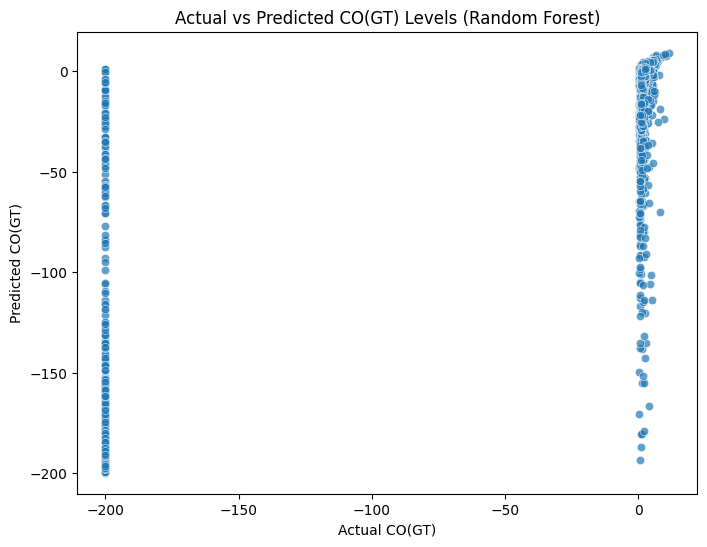

In [103]:
# 1. Actual vs Predicted (Random Forest)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7)
plt.xlabel("Actual CO(GT)")
plt.ylabel("Predicted CO(GT)")
plt.title("Actual vs Predicted CO(GT) Levels (Random Forest)")
plt.show()

In [104]:
# 2. Feature Importance
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)


/tmp/ipython-input-4041442976.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


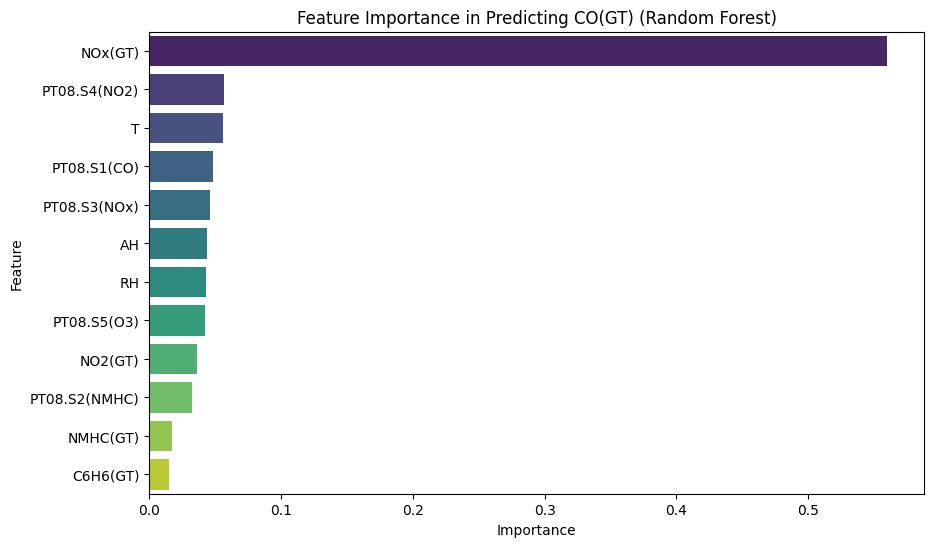

In [105]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance in Predicting CO(GT) (Random Forest)")
plt.show()